In [1]:
import eee

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np


### Specify ensemble

This ensemble has three species:

hdna + 2IPTG <--> h + 2IPTG <--> l2e

+ `hdna` (our observable, with dG0 = 0 kcal/mol)
+ `h` (unobserved structure that does not bind to anything; dG0 = 5 kcal/mol)
+ `l2e` (unobserved structure that binds to 2 iptg molecules; dG0 = 5 kcal/mol)

At highly positive IPTG concentration (low concentration), `hdna` will be highly favored. At highly negative IPTG concentrations (high concentration), `l2e` is favored. 

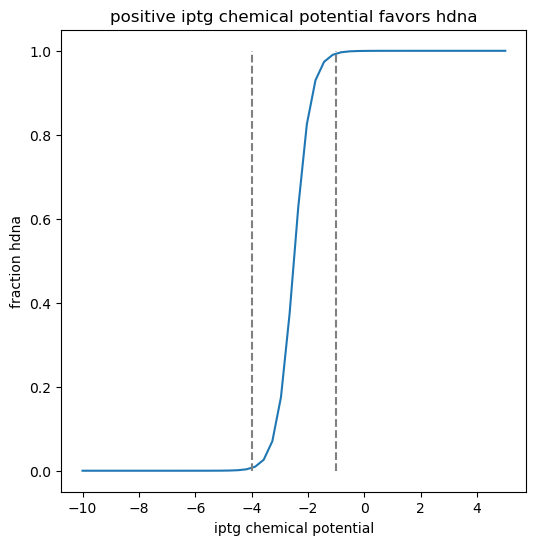

In [2]:
ens = eee.Ensemble()
ens.add_species("hdna",dG0=0,observable=True)
ens.add_species("h",dG0=5)
ens.add_species("l2e",dG0=5,mu_stoich={"iptg":2},observable=False)

df = ens.get_obs(mu_dict={"iptg":np.linspace(-10,5)})
fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(df.iptg,df.fx_obs)
ax.set_xlabel("iptg chemical potential")
ax.set_ylabel("fraction hdna")

ax.plot((-1,-1),(0,1),'--',color='gray')
ax.plot((-4,-4),(0,1),'--',color='gray')
ax.set_title("positive iptg chemical potential favors hdna")
None

### Calculate ensemble epistasis

Additive structural mutations to hdna and l2e lead to epistasis at the level of the observable

Text(0, 0.5, 'epistasis in fx_obs')

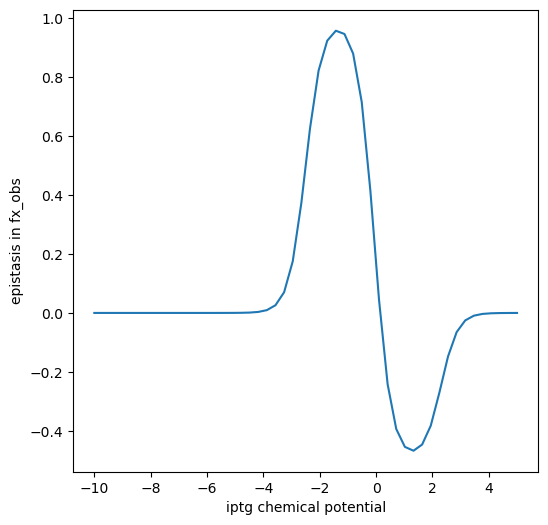

In [3]:
mut1_dict = {"hdna":5}
mut2_dict = {"l2e":-5}
mut12_dict = {"hdna":5,"l2e":-5}
mu_dict={"iptg":np.linspace(-10,5)}

df = eee.epistasis.get_ensemble_epistasis(ens,
                                          mut1_dict=mut1_dict,
                                          mut2_dict=mut2_dict,
                                          mut12_dict=mut12_dict,
                                          mu_dict=mu_dict)

fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(df.iptg,df.fx_ep_mag)
ax.set_xlabel("iptg chemical potential")
ax.set_ylabel("epistasis in fx_obs")
                            
